# Research of advertisements for apartments for sale

You have at your disposal data from the Yandex.Real Estate service - an archive of advertisements for apartments for sale in St. Petersburg and neighboring cities for several years. You need to learn how to determine the market value of real estate objects. Your task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity. 

For each apartment for sale, two types of data are available. The first is entered by the user, the second is obtained automatically on the basis of map data. For example, the distance to the center, airport, nearest park and water body. 


Our task is to preprocess the data and explore it to find interesting features and dependencies that exist in the real estate market. 
    
To do this, we will:
    
    * Examine the general information
    * Pre-process the data: fill in the blanks, match data types, process outlier values
    * Add the columns we need to analyze.
    * Conduct an exploratory analysis to find correlations between apartment parameters and its price.
    * Study how fast the apartments sold
    * Find the average, maximum and minimum price in the top 10 locations.


### Open the data file and examine the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

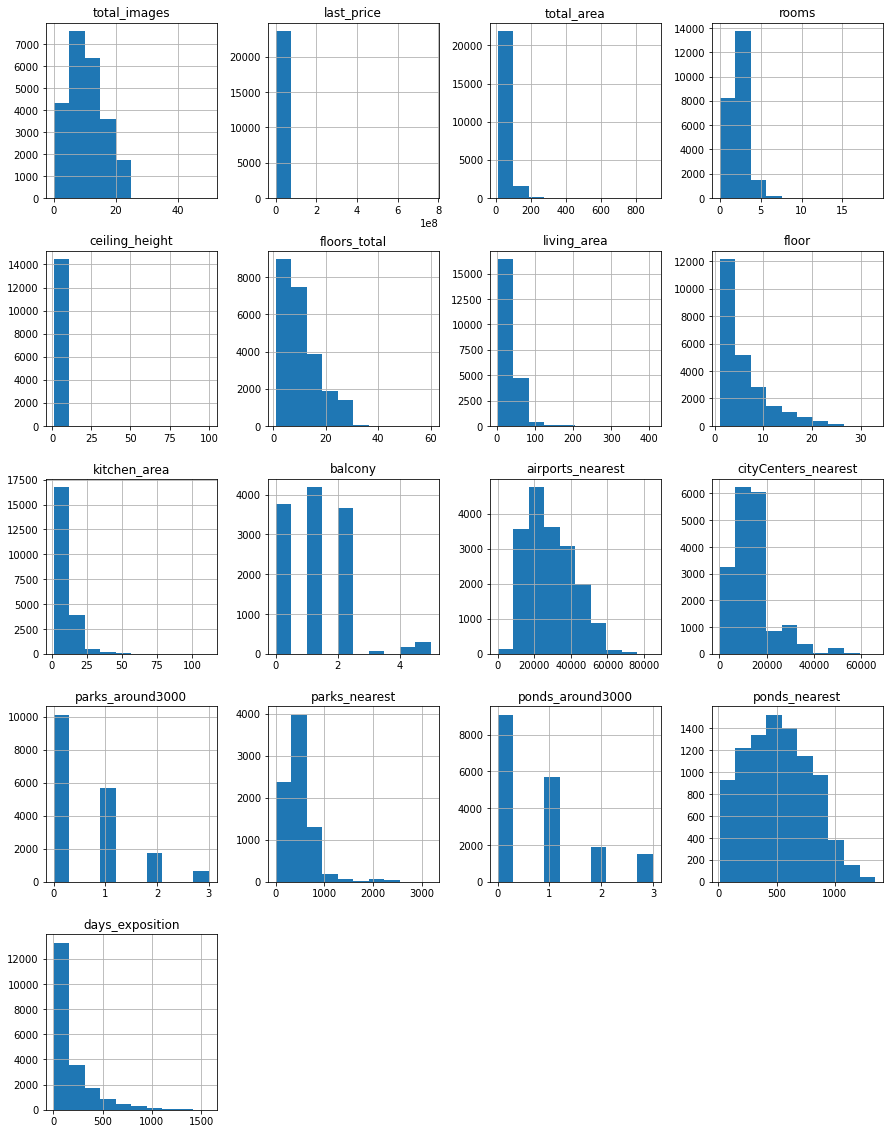

In [5]:
df.hist(figsize=(15,20))

Judging from the distribution, we have knock-out values that need to be handled. 

## Data preprocessing

### Missing values

<AxesSubplot:>

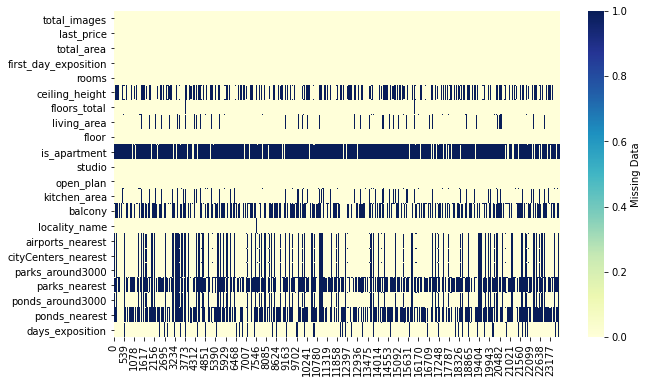

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


<Figure size 720x432 with 0 Axes>

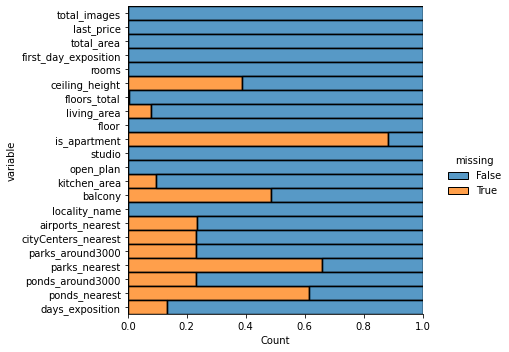

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Let's derive the omission rate


In [8]:
round(df.isnull().mean()*100,2) 

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Many columns have missing values. The columns `is_apartment`, `balcony`, `parks_nearest`, `ponds_nearest` stand out. We will deal with each one in turn. 

#### ceiling_height

<AxesSubplot:ylabel='Frequency'>

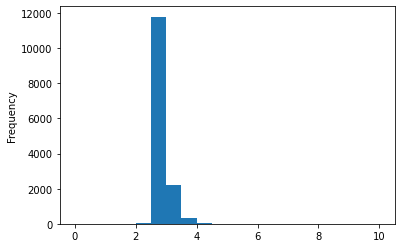

In [9]:
df['ceiling_height'].plot(kind='hist',bins=20, range=(0,10))

We see that the share of apartments with ceilings exceeding 4 meters is insignificant. Let's check.

In [10]:
df.query('ceiling_height>4')['ceiling_height'].count()/df['ceiling_height'].count()


0.005170987313844457

The share of apartments with abnormally high ceilings is very small, so we will get rid of such values. In addition, according to SANPIN, the ceiling height in the living space should not be lower than 2.5 meters. Therefore, we will get rid of such values as well.

In [11]:
df = df.loc[df['ceiling_height']>=2.5]
df = df.loc[df['ceiling_height']<4]

<AxesSubplot:>

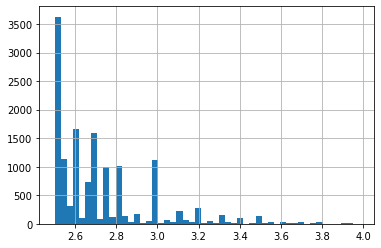

In [12]:
df['ceiling_height'].hist(bins=50)

In [13]:
df['ceiling_height'].isna().sum()

0

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [15]:
df['ceiling_height'].isna().sum()

0

#### living_area, kitchen_area, total_area 

<AxesSubplot:>

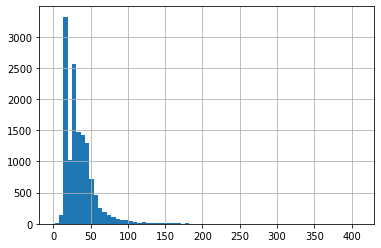

In [16]:
df['living_area'].hist(bins=70)

In [17]:
df['living_area'].describe()

count    13534.000000
mean        35.434648
std         22.091416
min          2.000000
25%         19.100000
50%         30.735000
75%         43.100000
max        409.700000
Name: living_area, dtype: float64

Accounting norm is the minimum amount of living space per person. In St. Petersburg, the following accounting norms apply: - 9 m2 of the total floor area of residential premises for those living in separate apartments and residential buildings. 

Let's get rid of the outliers in this column and fill in the blanks with the median value

In [18]:
df.loc[df['living_area'].isna(), 'living_area'] = df['living_area'].median() 

In [19]:
len(df.query('living_area<9')['living_area'])

10

In [20]:
df = df.loc[df['living_area']>9]

In [21]:
df['kitchen_area'].isna().sum()

917

In [22]:
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area'].median() 

In [23]:
len(df.query('kitchen_area<5 and is_apartment==True')['kitchen_area'])

0

 In one-room apartments it is allowed to design kitchens or kitchen niches of at least 5 m². 

In [24]:
df = df.loc[df['kitchen_area']>=5]

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

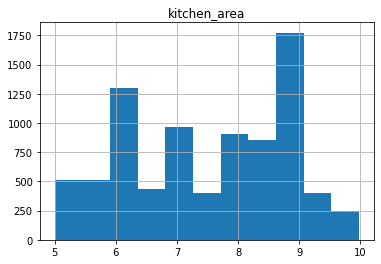

In [25]:
df.query('kitchen_area<10').hist(column='kitchen_area', bins=11)

 Check to see if the sum of the kitchen and living areas exceeds the total floor area 

In [26]:
df.query('living_area + kitchen_area > total_area')['total_area'].count()/df['total_area'].count() *100

2.0583069898138393

Such records account for 2% of all data. It is impossible to determine from the values themselves which column has incorrect data. Therefore, we will not consider them in this analysis for the accuracy of subsequent calculations. 

In [27]:
df = df.query('living_area + kitchen_area <= total_area')

#### floors_total

<AxesSubplot:>

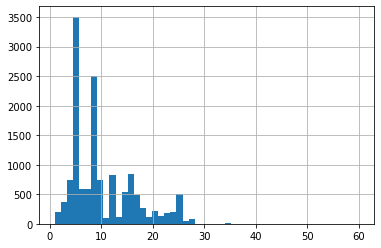

In [28]:
df['floors_total'].hist(bins=50)

In [29]:
df.query('floors_total>42')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


There is only one building with more than 42 floors - Lakhta Center - 88 floors. so he is dealing with unreliable data


In [30]:
df.drop(labels=2253, axis=0, inplace=True)

In [31]:
df.query('floors_total>42')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [32]:
df.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8478,19,13500000.0,77.8,2019-04-17T00:00:00,2,2.80,NaN,39.410,21,NaN,...,13.27,2.0,Санкт-Петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN
10568,12,14900000.0,100.0,2018-10-02T00:00:00,3,2.80,NaN,51.000,4,NaN,...,40.00,NaN,Санкт-Петербург,30766.0,8059.0,0.0,NaN,1.0,213.0,140.0
14264,13,14000000.0,94.0,2019-01-23T00:00:00,6,2.65,NaN,51.000,23,NaN,...,16.30,NaN,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN
16668,0,15950000.0,108.0,2017-10-24T00:00:00,3,2.80,NaN,30.735,3,NaN,...,9.00,NaN,Санкт-Петербург,26402.0,5249.0,0.0,NaN,2.0,444.0,91.0
20250,5,6060000.0,60.6,2015-10-29T00:00:00,2,2.80,NaN,30.735,2,NaN,...,9.00,NaN,Санкт-Петербург,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0
21651,4,7143060.0,44.7,2019-01-11T00:00:00,1,3.00,NaN,13.790,19,NaN,...,9.00,NaN,Санкт-Петербург,9222.0,11340.0,0.0,NaN,0.0,NaN,NaN
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,30.735,3,NaN,...,9.00,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
23658,6,3063600.0,43.8,2016-11-28T00:00:00,1,2.70,NaN,14.000,8,NaN,...,15.50,2.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,246.0


In [33]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

#### is_apartment

In [34]:
df['is_apartment'].value_counts(dropna=False)

NaN      12163
False     1743
True        35
Name: is_apartment, dtype: int64

There are 2 hypotheses:
* missing values -- not apartments
* missing values are apartments

The second one seems unrealistic, because a quick search on several ad aggregators showed that apartments are sold many times more often than apartments.

So let's fill in the blanks with the value False

In [35]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts(dropna=False)

False    13906
True        35
Name: is_apartment, dtype: int64

#### balcony

In [36]:
df['balcony'].value_counts(dropna=False)

NaN    6939
1.0    2741
2.0    2447
0.0    1382
5.0     224
4.0     138
3.0      70
Name: balcony, dtype: int64

It would be logical to assume that where data is missing, there are no balconies.

In [37]:
df['balcony']=df['balcony'].fillna(0)
df['balcony'].value_counts(dropna=False)

0.0    8321
1.0    2741
2.0    2447
5.0     224
4.0     138
3.0      70
Name: balcony, dtype: int64

#### rooms

In [38]:
df['rooms'].value_counts()

2     4735
1     4315
3     3722
4      785
5      219
6       68
7       41
0       35
9        7
8        5
10       3
11       2
16       1
12       1
14       1
15       1
Name: rooms, dtype: int64

In [39]:
df.query('rooms>=8')['rooms'].count()

21

The data are more like outliers, there are few such strings, we will not consider them.

In [40]:
df = df.query('rooms<9')

In [41]:
df['rooms'].value_counts()

2    4735
1    4315
3    3722
4     785
5     219
6      68
7      41
0      35
8       5
Name: rooms, dtype: int64

The number of rooms is set to 0. Most likely these are studio apartments, let's change it to value 1.

In [42]:
df.loc[df['rooms']==0, 'rooms'] = 1

In [43]:
df['rooms'].value_counts()

2    4735
1    4350
3    3722
4     785
5     219
6      68
7      41
8       5
Name: rooms, dtype: int64

#### parks_nearest, ponds_nearest, parks_around3000 , ponds_around3000 

In [44]:
df['parks_nearest'].isna().sum()

8829

In [45]:
df['ponds_nearest'].isna().sum()

8422

Lots of missing values, check to see if there is data in the columns for distance to parks and ponds. 

In [46]:
df.query('parks_nearest.isna() and parks_around3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.000,15,False,...,11.0,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.735,1,False,...,9.0,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.0,2018-03-29T00:00:00,1,2.75,18.0,16.300,9,False,...,11.6,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
62,0,4800000.0,78.6,2017-09-17T00:00:00,3,2.80,9.0,48.800,5,False,...,11.9,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
64,13,3100000.0,44.3,2017-11-07T00:00:00,2,2.50,5.0,29.000,5,False,...,5.3,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,30.735,2,False,...,9.0,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23677,8,2450000.0,35.0,2018-10-26T00:00:00,1,2.60,5.0,18.000,4,False,...,9.6,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.0
23682,11,2350000.0,35.6,2016-06-23T00:00:00,1,2.50,5.0,17.000,4,False,...,8.3,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.500,3,False,...,5.5,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.loc[(df['parks_nearest'].isna()) & (df['parks_around3000'].isna()),['parks_nearest','parks_around3000']] = 0

In [48]:
df.loc[(df['parks_nearest'].isna()) & (df['parks_around3000']==0),['parks_nearest']] = 0
df.query('parks_nearest.isna() and parks_around3000==0')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [49]:
df.query('ponds_around3000.isna() and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.000,15,False,...,11.0,2.0,деревня Кудрово,NaN,NaN,0.0,0.0,NaN,NaN,60.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.735,1,False,...,9.0,0.0,поселок городского типа Красный Бор,NaN,NaN,0.0,0.0,NaN,NaN,196.0
38,10,3150000.0,40.0,2018-03-29T00:00:00,1,2.75,18.0,16.300,9,False,...,11.6,0.0,посёлок Мурино,NaN,NaN,0.0,0.0,NaN,NaN,103.0
62,0,4800000.0,78.6,2017-09-17T00:00:00,3,2.80,9.0,48.800,5,False,...,11.9,2.0,Сертолово,NaN,NaN,0.0,0.0,NaN,NaN,5.0
64,13,3100000.0,44.3,2017-11-07T00:00:00,2,2.50,5.0,29.000,5,False,...,5.3,0.0,Гатчина,NaN,NaN,0.0,0.0,NaN,NaN,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,30.735,2,False,...,9.0,0.0,поселок городского типа Синявино,NaN,NaN,0.0,0.0,NaN,NaN,45.0
23677,8,2450000.0,35.0,2018-10-26T00:00:00,1,2.60,5.0,18.000,4,False,...,9.6,0.0,Всеволожск,NaN,NaN,0.0,0.0,NaN,NaN,28.0
23682,11,2350000.0,35.6,2016-06-23T00:00:00,1,2.50,5.0,17.000,4,False,...,8.3,2.0,Выборг,NaN,NaN,0.0,0.0,NaN,NaN,40.0
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.500,3,False,...,5.5,0.0,посёлок Дзержинского,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [50]:
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around3000'].isna()),['ponds_nearest','ponds_around3000']] = 0



In [51]:
df.query('ponds_around3000.isna() and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [52]:
df.query('ponds_nearest.isna() and ponds_around3000==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0
16,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,False,...,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
18,8,3250000.0,31.0,2017-01-27T00:00:00,1,2.50,5.0,19.4,2,False,...,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,False,...,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,0.0,0.0,NaN,97.0
20,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27.0,48.0,11,False,...,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,0.0,0.0,NaN,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23668,13,6000000.0,47.0,2018-03-16T00:00:00,2,3.00,5.0,27.0,4,False,...,9.0,1.0,Санкт-Петербург,36474.0,9167.0,2.0,238.0,0.0,NaN,157.0
23680,14,5000000.0,59.0,2019-04-04T00:00:00,3,2.50,5.0,52.0,1,False,...,7.0,0.0,Санкт-Петербург,26835.0,11878.0,0.0,0.0,0.0,NaN,NaN
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.6,0.0,Санкт-Петербург,11827.0,11459.0,0.0,0.0,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,0.0,0.0,NaN,NaN


In [53]:
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around3000']==0),['ponds_nearest']] = 0
df.query('ponds_nearest.isna() and ponds_around3000==0')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Possible reason for omissions: these fields are optional when filling out the announcement

#### airports_nearest, cityCenters_nearest, days_exposition

We will leave omissions in these columns `airports_nearest`, `cityCenters_nearest` so that they do not affect the results of the analysis further when looking for correlation. 

In [54]:
df['days_exposition'].isna().sum()

2371

In [55]:
df['days_exposition'].isna().sum()

2371

In [56]:
df[['first_day_exposition', 'days_exposition']].head(10)

,first_day_exposition,days_exposition
0,2019-03-07T00:00:00,NaN
4,2018-06-19T00:00:00,121.0
9,2017-02-26T00:00:00,289.0
10,2017-11-16T00:00:00,137.0
13,2017-07-01T00:00:00,366.0
16,2017-11-23T00:00:00,397.0
18,2017-01-27T00:00:00,168.0
19,2019-01-09T00:00:00,97.0
20,2017-09-28T00:00:00,74.0
22,2017-04-24T00:00:00,60.0


We see that the age of the ad does not depend on the first day of publication. So, let's leave the missing values. 

#### last_price

In [57]:
df.loc[df['last_price'] > 300000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,False,...,40.0,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0


In [58]:
df.query('last_price<1000000')['last_price'].count()

77

### Data types

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13925 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          13925 non-null  int64  
 1   last_price            13925 non-null  float64
 2   total_area            13925 non-null  float64
 3   first_day_exposition  13925 non-null  object 
 4   rooms                 13925 non-null  int64  
 5   ceiling_height        13925 non-null  float64
 6   floors_total          13925 non-null  float64
 7   living_area           13925 non-null  float64
 8   floor                 13925 non-null  int64  
 9   is_apartment          13925 non-null  bool   
 10  studio                13925 non-null  bool   
 11  open_plan             13925 non-null  bool   
 12  kitchen_area          13925 non-null  float64
 13  balcony               13925 non-null  float64
 14  locality_name         13913 non-null  object 
 15  airports_nearest   

In the first_day_exposition column the data type is object, but it should be datetime

In [60]:
df['first_day_exposition'].head(5)

0     2019-03-07T00:00:00
4     2018-06-19T00:00:00
9     2017-02-26T00:00:00
10    2017-11-16T00:00:00
13    2017-07-01T00:00:00
Name: first_day_exposition, dtype: object

In [61]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [62]:
df['first_day_exposition'].head(10)

0    2019-03-07
4    2018-06-19
9    2017-02-26
10   2017-11-16
13   2017-07-01
16   2017-11-23
18   2017-01-27
19   2019-01-09
20   2017-09-28
22   2017-04-24
Name: first_day_exposition, dtype: datetime64[ns]

Let's change the data types in the columns with float, where integer values will be needed.

In [63]:
values = ['last_price','total_area', 'ceiling_height','floors_total','living_area',
          'kitchen_area','balcony',
          'parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'
          ]
for i in values:
    df[i] = df[i].round().astype('int32')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13925 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          13925 non-null  int64         
 1   last_price            13925 non-null  int32         
 2   total_area            13925 non-null  int32         
 3   first_day_exposition  13925 non-null  datetime64[ns]
 4   rooms                 13925 non-null  int64         
 5   ceiling_height        13925 non-null  int32         
 6   floors_total          13925 non-null  int32         
 7   living_area           13925 non-null  int32         
 8   floor                 13925 non-null  int64         
 9   is_apartment          13925 non-null  bool          
 10  studio                13925 non-null  bool          
 11  open_plan             13925 non-null  bool          
 12  kitchen_area          13925 non-null  int32         
 13  balcony         

Let's change data types from loat64 to float32 and from int64 to int32 to save memory  

In [65]:
int_cols = ['total_images', 'rooms','floor']
for i in int_cols:
    df[i] = df[i].astype('int32')
    
float_cols = ['airports_nearest','cityCenters_nearest','days_exposition']
for i in float_cols:
    df[i] = df[i].astype('float32')

### Eliminating Implicit Duplicates

In [66]:
df['locality_name'] = df['locality_name'].fillna('Нет данных') 

In [67]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок городского типа Красный Бор',
       'посёлок Мурино', 'Сертолово', 'Гатчина', 'поселок Мурино',
       'Ломоносов', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Колпино', 'Кировск', 'деревня Новое Девяткино',
       'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Луга', 'Волосово',
       'поселок Оредеж', 'посёлок городско

In [68]:
def slice_index(row):
    for i in range(len(row)):
         if row[i].isupper():
            return row[i:]


        

In [69]:
df['new_locality_name'] = df['locality_name'].map(slice_index)

In [70]:
df['new_locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'Парголово', 'Кудрово', 'Пушкин',
       'Красный Бор', 'Мурино', 'Сертолово', 'Гатчина', 'Ломоносов',
       'Фёдоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'Новое Девяткино', 'Сиверский', 'Новая Ропша', 'Павловск',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Кузьмоловский', 'Куттузи', 'Торковичи', 'Шушары', 'Первомайское',
       'Красное Село', 'Понтонный', 'Старая', 'Лесколово', 'Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Рощино', 'Сясьстрой',
       'Луга', 'Волосово', 'Оредеж', 'Бугры', 'Металлострой',
       'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Романовка', 'Александровская', 'Лопухинка', 'Советский', 'Кириши',
       'Петровское', 'Токсово', 'Новый Свет', 'Келози', 'Вартемяги',
       'Подпорожье', 'Тельмана', 'Большая Ижора', 'Нет данных', 'Янино-1',
       'Агалато

In [71]:
def change_type(row):
    if 'посёлок' in row or 'поселок' in row:
        return 'поселок'
    elif 'деревня' in row:
        return 'деревня'
    elif 'товарищество' in row:
        return 'товарищество'
    else:
        return 'город'
    

In [72]:
df['locality_type'] = df['locality_name'].map(change_type)

In [73]:
df['locality_type'].unique()

array(['город', 'поселок', 'деревня', 'товарищество'], dtype=object)

We created two columns with the name of the settlement and its type - this will make it easier to do aggregation if we need data for each type of settlement.

## Count and add new columns to the table

In [74]:
df['price_per_square_meter'] = df['last_price']/df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].round().astype('int')

In [75]:
df['publication_day'] = df['first_day_exposition'].dt.dayofweek

In [76]:
df['publication_month'] = df['first_day_exposition'].dt.month

In [77]:
df['publication_year'] = df['first_day_exposition'].dt.year

In [78]:
def change_floor_type(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    

In [79]:
df['floor_type'] = df.apply(change_floor_type, axis=1)

In [80]:
df.loc[df['cityCenters_nearest'].notnull(),'city_centers_nearest_km'] = df['cityCenters_nearest']/1000
df.loc[df['city_centers_nearest_km'].notnull(),'city_centers_nearest_km'] = df['city_centers_nearest_km'].round()

In [81]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,new_locality_name,locality_type,price_per_square_meter,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_km
0,20,13000000,108,2019-03-07,3,3,16,51,8,False,...,755,NaN,Санкт-Петербург,город,120370,3,3,2019,другой,16.0
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,...,48,121.0,Санкт-Петербург,город,100000,1,6,2018,другой,8.0
9,18,5400000,61,2017-02-26,3,2,9,44,7,False,...,0,289.0,Санкт-Петербург,город,88525,6,2,2017,другой,15.0
10,5,5050000,40,2017-11-16,1,3,12,20,3,False,...,553,137.0,Санкт-Петербург,город,126250,3,11,2017,другой,14.0
13,20,3550000,43,2017-07-01,2,3,5,27,5,False,...,298,366.0,Петергоф,город,82558,5,7,2017,последний,33.0


## Conduct an exploratory analysis of the data

### Examine the parameters of objects

<AxesSubplot:ylabel='Frequency'>

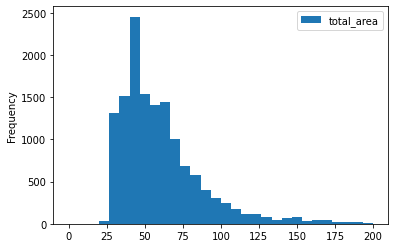

In [82]:
df.plot(y='total_area', kind='hist', bins=30, range=(0,200))

In [83]:
df['total_area'].describe()

count    13925.000000
mean        61.938671
std         34.275966
min         21.000000
25%         42.000000
50%         54.000000
75%         72.000000
max        631.000000
Name: total_area, dtype: float64

3/4 of values do not exceed 70 m2. The standard deviation is very large, but real estate market offers are diverse and at first glance anomalous values can be real, it is necessary to deal with each announcement separately.

<AxesSubplot:ylabel='Frequency'>

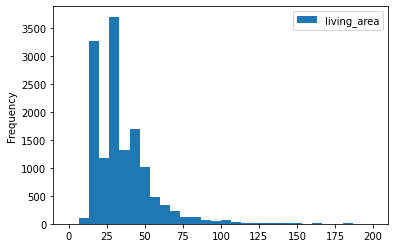

In [84]:
df.plot(y='living_area', kind='hist', bins=30, range=(0,200))

<AxesSubplot:ylabel='Frequency'>

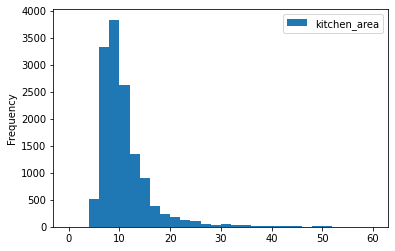

In [85]:
df.plot(y='kitchen_area', kind='hist', bins=30, range=(0,60))

В площади жилого помещения наблюдается два пика.
Площадь кухни же больше напоминает нормальное распределение с пиком в районе 10 м2

count       13925.00
mean      6759647.12
std       9231780.87
min         12190.00
25%       3600000.00
50%       4900000.00
75%       7100000.00
max     330000000.00
Name: last_price, dtype: float64

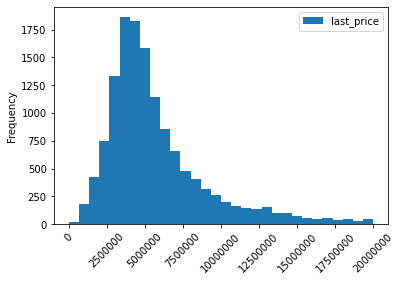

In [86]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.plot(y='last_price', kind='hist',bins=30, range=(0,20000000))
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45)
df['last_price'].describe()


The cost of 75% of apartments does not exceed 7 million. 

array([3, 2, 1, 4, 6, 5, 7, 8], dtype=int32)

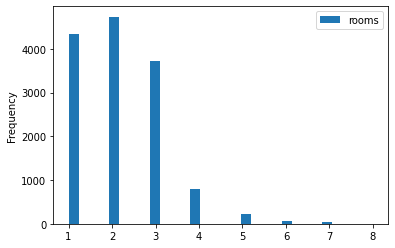

In [87]:
df.plot(y='rooms', kind='hist', bins=30)
df['rooms'].unique()

The largest number of announcements of sales of one-room apartments, with a small gap go two-bedroom apartments, 20% less often sell two-bedroom apartments. 

<AxesSubplot:>

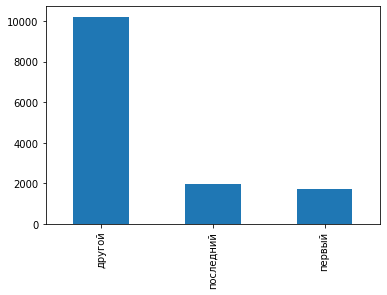

In [88]:
df['floor_type'].value_counts().plot(kind='bar')

In the vast majority of cases, they sell apartments between the first and the last floor. Let's see which floors have more.

<AxesSubplot:ylabel='Frequency'>

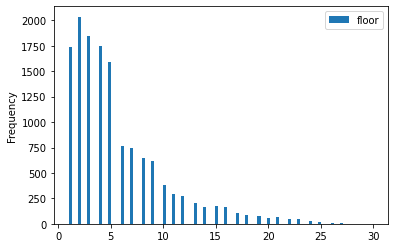

In [89]:
df.plot(y='floor', kind='hist', bins=100)

The most popular floor is the second floor, followed by the third floor. 

<AxesSubplot:ylabel='Frequency'>

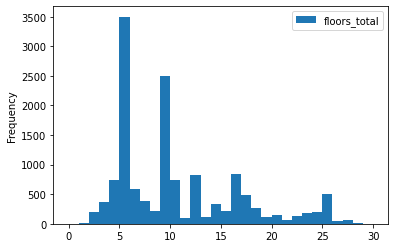

In [90]:
df.plot(y='floors_total', kind='hist', bins=30, range=(0,30))

This is a very interesting distribution. We see that apartments are sold mainly in five- and nine-storey buildings.

count   11129.00
mean       14.13
std         8.73
min         1.00
25%         9.00
50%        13.00
75%        16.00
max        66.00
Name: city_centers_nearest_km, dtype: float64

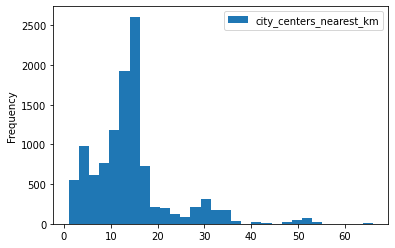

In [91]:
df.query('city_centers_nearest_km>0').plot(y='city_centers_nearest_km', kind='hist', bins=30)
df.query('city_centers_nearest_km>0')['city_centers_nearest_km'].describe()

3/4 of all apartments are located at a distance of 16 km from the center.

count   11127.00
mean    28886.48
std     12625.68
min      6914.00
25%     18551.50
50%     26831.00
75%     37242.00
max     84869.00
Name: airports_nearest, dtype: float64

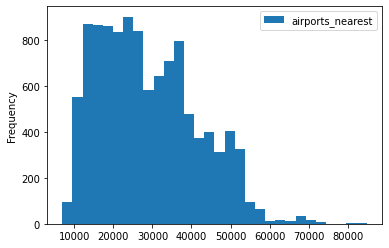

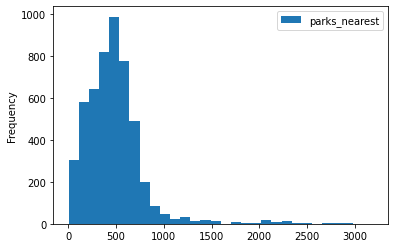

In [92]:
df.query('airports_nearest>0').plot(y='airports_nearest', kind='hist', bins=30)
df.query('parks_nearest>0').plot(y='parks_nearest', kind='hist', bins=30)

df.query('airports_nearest>0')['airports_nearest'].describe()

Parks are much closer to homes than airports. Which is realistic, given that airports are closer to the city limits, and most apartments are within 16 km of the center.

<AxesSubplot:ylabel='Frequency'>

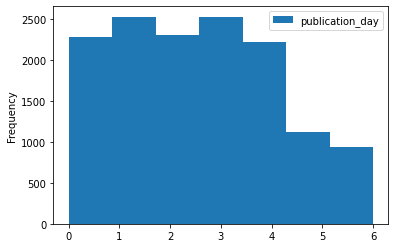

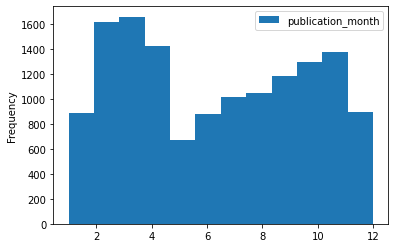

In [93]:
df.plot(y='publication_day', kind='hist', bins=7)
df.plot(y='publication_month', kind='hist', bins=12)


We see that
* advertisements are published least often on Saturdays and Sundays, more often on Tuesdays and Thursdays
* the most unpopular months of publication are January and May, popular months are February, March and April

#### Examine how fast apartments are selling

<AxesSubplot:ylabel='Frequency'>

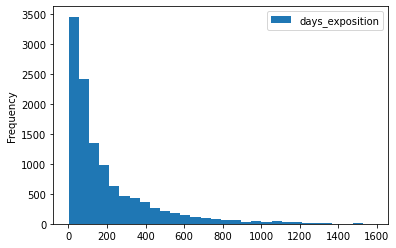

In [94]:
df.plot(y='days_exposition', kind='hist', bins=30)

In [95]:
df['days_exposition'].describe()

count   11554.00
mean      191.20
std       228.81
min         1.00
25%        45.00
50%       104.00
75%       249.00
max      1580.00
Name: days_exposition, dtype: float64

<AxesSubplot:>

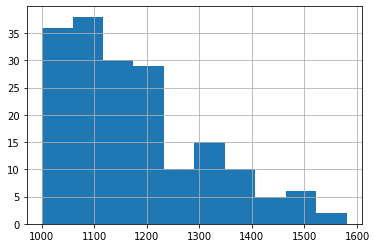

In [96]:
df.query('days_exposition>1000')['days_exposition'].hist()

* The average sale takes 95 days.
* Ads up to 45 days old are fast sales
* Ads over 200 days old are slow sellers
* Unusually long 1,000 days or more 

### Factors affecting the value of the object

To accurately work with no knock out values, let's take apartments that cost less than 20 million.

In [97]:
price_df = df.query('5000000<=last_price<=20000000')

def visualise_price_corr(column):
    price_df.plot(x='last_price', y=column, kind='scatter', alpha=0.03)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.xticks(rotation = 45)
    
    print(f'Корреляция с {column}:', price_df['last_price'].corr(price_df[column]))

Корреляция с total_area: 0.7014157452623173
Корреляция с kitchen_area: 0.4920474307838877
Корреляция с living_area: 0.5507141199873438


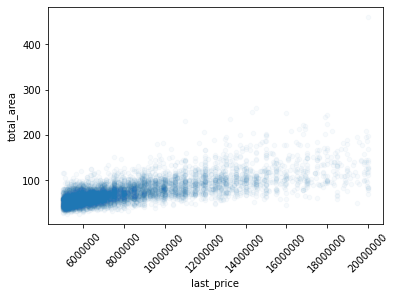

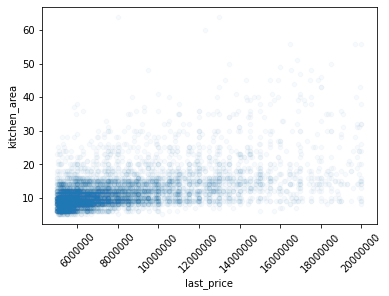

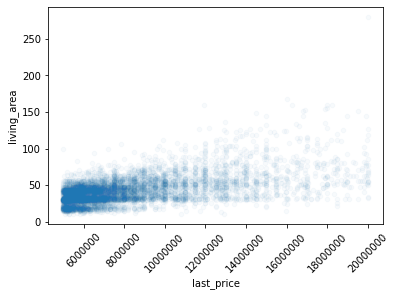

In [98]:
visualise_price_corr('total_area')
visualise_price_corr('kitchen_area')
visualise_price_corr('living_area')


* Most of all the price depends on the meterage: common (0.65), living space (0.52) and kitchen (0.42)


In [99]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.69,0.39,-0.24
total_area,0.69,1.00,0.76,-0.25
rooms,0.39,0.76,1.00,-0.19
cityCenters_nearest,-0.24,-0.25,-0.19,1.00


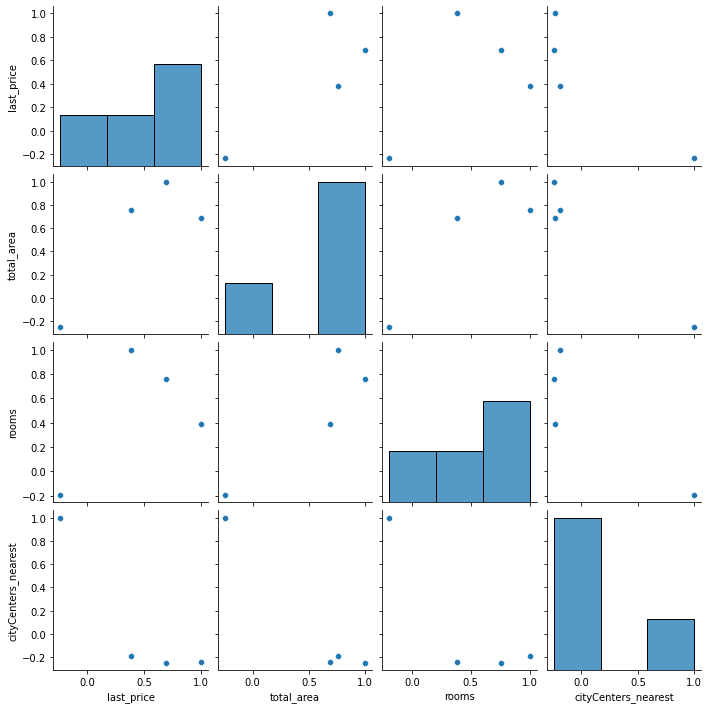

In [100]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

In [101]:
def groupby_plotting(col):
    df.groupby(col)['price_per_square_meter'].median().plot()
    plt.ticklabel_format(useOffset=False, style='plain')

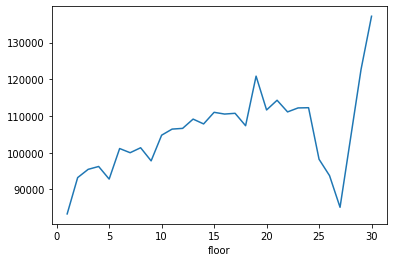

In [102]:
groupby_plotting('floor')

After the 25th floor something strange happens with prices - it looks like incorrect values. 
It can be traced that the median price increases with the floor. But we should check whether this is not due to the fact that buildings with more than 10 floors are most likely to be in St. Petersburg, where the cost per square meter is higher.

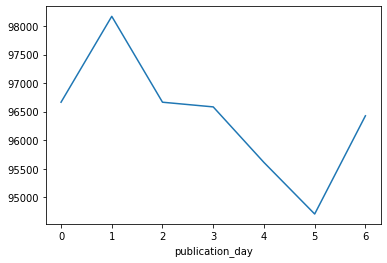

In [103]:
groupby_plotting('publication_day')



The difference in cost is quite small 

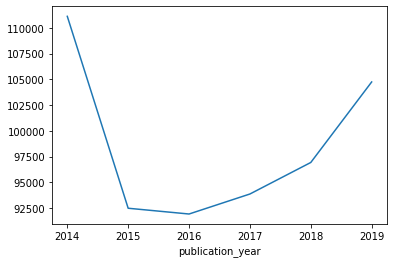

In [104]:
groupby_plotting('publication_year')

Apartment values fell sharply by '15, but began to rise in '16.

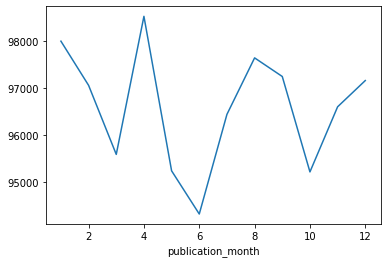

In [105]:
groupby_plotting('publication_month')

The price difference is negligible to draw any conclusions. 

### Settlements with the highest and lowest cost per square meter.

In [119]:
locality_df = price_df.pivot_table(index='new_locality_name', values='price_per_square_meter', aggfunc=['min','max','mean'])

In [120]:
locality_df.columns = ['min_price','max_price','mean']

In [108]:
locality_df.head(10)

,min_price,max_price,mean
new_locality_name,,,
Агалатово,71622,71622,71622.00
Александровская,76966,76966,76966.00
Аннино,77397,77397,77397.00
Бугры,72000,102000,83004.00
Всеволожск,49342,135526,74804.12
Выборг,42735,107473,69665.57
Гатчина,52899,146316,85013.37
Гостилицы,56780,56780,56780.00
Заневка,94444,94444,94444.00


In [109]:
localities_df = price_df['new_locality_name'].value_counts().to_frame()

In [110]:
localities_df.columns = ['count']

In [111]:
localities_df = localities_df.sort_values(by='count', ascending=False).head(10)

In [112]:
local_df = localities_df.join(locality_df)

In [113]:
local_df.head(10)

,count,min_price,max_price,mean
Санкт-Петербург,5628,43384,390000,115893.42
Пушкин,116,67797,161538,107968.15
Сестрорецк,76,53333,182688,105780.00
Кудрово,58,69835,160000,95423.50
Шушары,56,56034,110000,77007.39
Мурино,50,62353,130000,81911.40
Всеволожск,42,49342,135526,74804.12
Парголово,36,56146,138158,89303.08
Петергоф,28,68500,224386,100146.93
Колпино,27,57477,125000,78891.26


<AxesSubplot:>

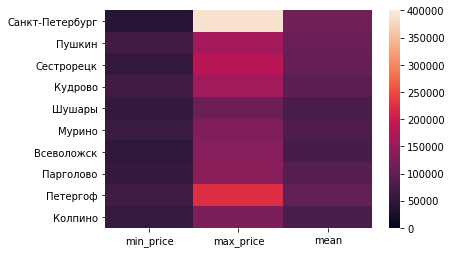

In [114]:
vis_data = local_df.sort_values(by='count', ascending=False).head(10)
vis_data = vis_data[['min_price','max_price','mean']]
sns.heatmap(vis_data,vmax=400000, vmin=0)

* The highest price per m2 in St. Petersburg and Pushkin
* The lowest price is in St. Petersburg and Vsevolozhsk
* Highest price in St. Petersburg and Pushkin, lowest in Vyborg and Vsevolozhsk.

Let's find the average, maximum and minimum price of the top 10 localities according to the number of ads.

In [115]:
print('Средняя цена квадратного метра:', local_df['mean'].mean().round())
print('Минимальная цена квадратного метра:', local_df['min_price'].min())
print('Максимальная цена квадратного метра:', local_df['max_price'].max())


Средняя цена квадратного метра: 92713.0
Минимальная цена квадратного метра: 43384
Максимальная цена квадратного метра: 390000


In [128]:
(
    price_df
    .pivot_table(index='new_locality_name', values='price_per_square_meter', aggfunc=['count','mean'])
    .reset_index()
    .sort_values(by=(            'count', 'price_per_square_meter'), ascending=False)
).head(10)

,new_locality_name,count,mean
,,price_per_square_meter,price_per_square_meter
31,Санкт-Петербург,5628,115893.42
29,Пушкин,116,107968.15
33,Сестрорецк,76,105780.00
16,Кудрово,58,95423.50
44,Шушары,56,77007.39
22,Мурино,50,81911.40
4,Всеволожск,42,74804.12
27,Парголово,36,89303.08
28,Петергоф,28,100146.93


### Average price per kilometer in St. Petersburg


In [129]:
spb_df = price_df.query('locality_name=="Санкт-Петербург"')[['last_price','city_centers_nearest_km']]
spb_df['price_per_km'] = spb_df['last_price']/spb_df['city_centers_nearest_km']
spb_df.head()

,last_price,city_centers_nearest_km,price_per_km
0,13000000,16.00,812500.00
4,10000000,8.00,1250000.00
9,5400000,15.00,360000.00
10,5050000,14.00,360714.29
16,6700000,11.00,609090.91


(array([-2500000.,        0.,  2500000.,  5000000.,  7500000., 10000000.,
        12500000., 15000000., 17500000., 20000000., 22500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

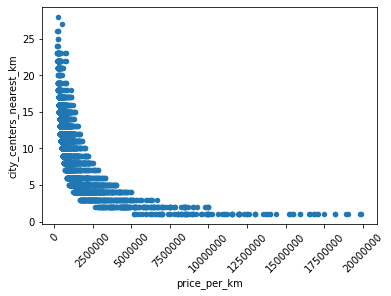

In [117]:
spb_df.plot(y='city_centers_nearest_km', x='price_per_km', kind='scatter')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45)

The closer the apartment is to the center, the more expensive is the square meter.

Let's build a graph, look at the emissions.

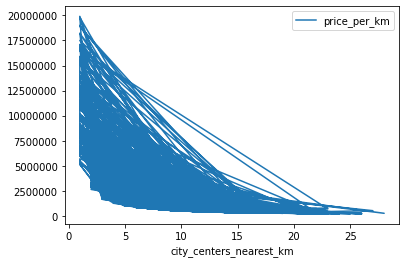

In [118]:
spb_df.plot(y='price_per_km', x='city_centers_nearest_km', kind='line')
plt.ticklabel_format(useOffset=False, style='plain')



<AxesSubplot:xlabel='city_centers_nearest_km'>

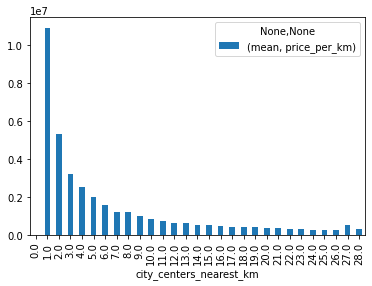

In [138]:
(
    spb_df
    .pivot_table(index='city_centers_nearest_km', values='price_per_km', aggfunc=['mean'])
    .plot(kind='bar')
)

## Overall conclusion

We processed the data of apartment ads from 2014 to 2019. We processed missing values, outliers, created new columns and studied the correlation between different apartment parameters and its price. As a result, we found out the following.

**The majority of ads have the following characteristics:**
- Total meterage from 30 to 50m2 with a kitchen of 10m2
- Cost from 3 to 5 million.
- 1 or 2 rooms
- Second or tertiary floor
- Are located no further than 16 km to the center (for apartments whose distance is known)
- Have a park within 1 km

**Statistics of the ads themselves:**
- Most popular days and months of publication: Tuesday and Thursday, February, March and April
- Least popular days and months of publication: Saturday and Sunday, January and May.
- The average sale takes 95 days

**Parameters on which the price depends:**
- Square footage - the bigger the bigger, the more expensive. We will also include the number of rooms, as these parameters are correlated.
- Location: 
    - The highest price per m2 is in St. Petersburg and Pushkin
    - The lowest price is in St. Petersburg and Pargolovo.
    - The average price is higher in St. Petersburg and Pushkin, lower in Vyborg and Vsevolozhsk.
- Proximity to the center: the closer the apartment is to the center, the more expensive is a square meter.

Average cost per square meter: 92713.0
Minimum cost per square meter: 43384
Maximum cost per square meter: 390000

**Based on the obtained results, we recommend to set the price per square meter at 93t.**.

